Import Packages

In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import pandas as pd

Load & filter Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
'''

Saving Photo.csv to Photo.csv


Saving Tag.csv to Tag.csv


In [3]:
# location for google drive mount
loc1 = '/content/drive/MyDrive/Datas/Tag.csv'
loc2 = '/content/drive/MyDrive/Datas/Photo.csv'
# location for local mount
#loc1 = '/content/Tag.csv'
#loc2 = '/content/Photo.csv'

In [4]:
tag = pd.read_csv(loc1, names=['photo_id','label_num','label_name'])
photo = pd.read_csv(loc2, names=['photo_id', 'user_id', 'geo_latitude','geo_longitude', 'taken_time','None'] )
dataset = photo[['photo_id','geo_latitude','geo_longitude']]

In [5]:
X = np.array(dataset[['geo_latitude','geo_longitude']]) # Make training set with geo coordinate
bandwidth = estimate_bandwidth(X, random_state=2021, n_samples=10000) # calculate standard bandwidth value

In [6]:
bandwidth

0.06600568106466975

Train clustering model

In [7]:
# Scikit learn does not support GPUs :(
'''
import torch
new_X = torch.from_numpy(X).to(torch.device('cuda'))
'''

"\nimport torch\nnew_X = torch.from_numpy(X).to(torch.device('cuda'))\n"

In [16]:
clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True) # Make model
clustering.fit(X) # Train model
labels = clustering.labels_ # label of input
centers = clustering.cluster_centers_ # coordinate of cluster centers
labels_unique = np.unique(labels) # set of labels
n_clusters = len(labels_unique) # number of clusters
len(labels) # total input size (# of coordinates)

991766

Draw all clustered data points to 2D

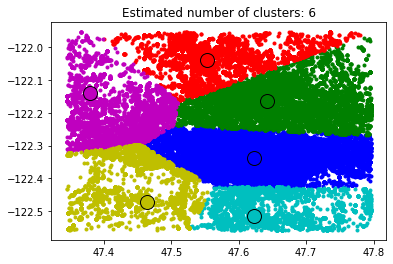

In [31]:
# Draw figure
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykkbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

Copy images to each clustered group

In [46]:
import shutil
import os
source = '/content/drive/MyDrive/Datas/in/' # source position
target_position = '/content/drive/MyDrive/Datas/out2/' # destination position
ids = list(dataset['photo_id']) # photo_id list of total data
filelist = os.listdir(source) # get total image file list

In [ ]:
filelist

In [34]:
total_file = []
for i in range(len(filelist)):
  total_file.append(filelist[i].split('.')[0]) # remove .jpg
total_file = [int(x) for x in total_file] # str to int

In [ ]:
total_file

In [36]:
for i in range(len(ids)): # copy photos to each class directory
  if ids[i] in total_file:
    shutil.copy(source + str(ids[i]) + '.jpg', target_position + str(labels[i] + 1))

Validating copy is succeful

In [41]:
len(filelist)

4851

In [47]:
sum = 0
for i in range(n_clusters):
  temp = os.listdir(target_position + str(i+1))
  sum += len(temp)
print(sum)

4851
